# 累積分布関数と生存関数

確率変数$X$の**累積分布関数**$F(x)$は$F(x) = P(X \leq x)$と表される。  
累積分布関数は離散型確率変数でも連続型確率変数でも同じ形で定義される。

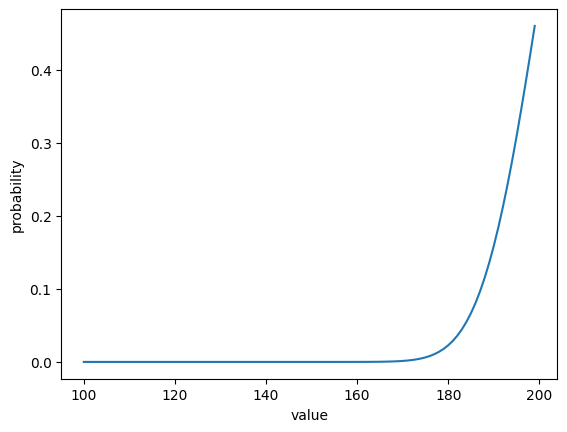

In [1]:
# 平均200，標準偏差10の正規分布の累積分布関数
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.arange(100, 200)
y = norm.cdf(x, loc=200, scale=10)
plt.plot(x, y)
plt.xlabel("value")
plt.ylabel("probability")
plt.show() # P(X<=200)は0.5くらい？

確率変数Xが寿命をあらわす場合には、$S(x)=1-F(x)$は時刻$x$にまだ生きている確率をあらわす。  
この時の$S(x)$を**生存関数**と呼ぶ。また$F(x)$は寿命が$x$以下の確率の関数であり累積分布関数である。  
また、寿命$X$が連続確率変数として、$h(x) = \frac{f(x)}{1-F(x)} = (- \log S(X))'$を**ハザード関数**と呼ぶ。  
ハザード関数は時刻$X$において生存している者のうち、その後短時間に死亡する者の率に対応する。  
詳細は「19_回帰分析その他.ipynb」を参照のこと

# 同時確率密度関数

$X, Y$を二つの離散確率変数とするとき、「$X$が値$x$をとり、$Y$が値yをとる確率」を$p(x,y)=P(X=x, Y=y)$とあらわし、**同時確率変数**と呼ぶ。  
また$X \leq x$かつ$Y \leq y$となる確率
$$
F(x,y) = P(X \leq x, Y \leq y) = \sum_{x' \leq x, y' \leq y} p(x', y')
$$
を累積分布関数という。同時確率関数から$X$のみの確率関数$p_X(x)$を得るには、$P(X=x) = \sum_{y} P(X=x, Y=y)$であるから、
$$
p_X(x) = \sum_{y} P(X=x, Y=y)
$$
のように$y$についての和をとればよい。$X$の分布を**周辺分布**とよび、$p_X(x)$を**周辺確率関数**とよぶ。  
また、$X=x$が与えられたときに$Y=y$となる条件付確率は
$$
P_{Y|X}(y|x) = \frac{p(x,y)}{p_X(x)}
$$
であり、$P_{Y|X}(y|x)$を**条件付き確率関数**とよぶ。  
次に連続確率変数の場合を説明する。$X, Y$を二つの連続確率変数のとき、$F(x, y)=P(X \leq x, Y \leq y)$を累積分布関数とする。  
$X, Y$の同時確率密度関数$f(x, y)$は、$F(x, y)$を$x$と$y$でそれぞれ偏微分して
$$
f(x, y) = \frac{\partial^2}{\partial_x \partial_y} F(x,y)
$$
と定義される。
Xの**周辺確率密度関数**は、$f_X(x)$は$f_X(x) = \int_{-\infty}^{\infty} f(x,y) dy$で与えられ、$X=x$を所与としたときの$y$の**条件付き確率密度関数**は
$$
f_{Y|X}(y|x) = \frac{f(x,y)}{f_X(x)}
$$
で与えられる。

# 母関数

確率関数や確率密度関数の性質(Ex, 期待値、分散、歪度、尖度)を調べるために**モーメント母関数**(**積率母関数**)や**確率母関数**が用いられる。  
モーメント母関数は確率変数$X$に対して、$m(\theta)=E[e^{\theta X}]$で定義される。  
離散型の場合には、$m(\theta) = \sum_{x} e^{\theta x} f(x)$、連続型の場合には、$m(\theta) = \int_{-\infty}^{\infty} e^{\theta x} f(x)dx$と定義される。  
これらを$n$回微分したものに$\theta=0$を代入すると、確率変数$X$を$n$乗したものの期待値になる。  
この時の期待値は$X$の$n$次モーメントとよばれる。  
$1$次モーメント：$m'(0) = E[X]$, $2$次モーメント：$m''(0) = E[X^2]$, …, $n$次モーメント：$m^{(n)}(0) = E[x^n]$である。  

In [2]:
# モーメント母関数を利用して平均と分散を求める
from scipy.stats import norm
from scipy.stats import moment

# 標準正規分布から乱数を生成する(μ=0, σ=1.0)
vals = norm.rvs(size=100000)
E_x = moment(vals, moment=1)
print("E[X]:{}".format(E_x)) # μ=0と一致

E_x2 = moment(vals, moment=2)
V_x = E_x2 - E_x**2 # 分散を求める公式
print("V[X]:{}".format(V_x)) # σ=1.0とおおむね一致

E[X]:0.0
V[X]:1.0116144423943232
